In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy.sql import text
import datetime

In [2]:
DB_NAME = "postgres"
DB_USER = "root"
DB_PASS = "7KxkIO3N4g6vef7W8mMf"
DB_HOST = "database-1.ctkumo88chgh.us-east-2.rds.amazonaws.com"
DB_PORT = "5432"
db_url = f"postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}"

engine = create_engine(db_url)
conn = engine.connect()

In [3]:
sql = """
select * from testdata;
"""

df = pd.read_sql(sql, conn)

In [4]:
df

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,...,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,late_code,source_instance,estimated_time_minutes
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,None,17:29:30,17:30:00,17:30:00,...,10.0,None,None,None,None,False,False,None,None,None
1,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,SHENFLD,None,17:38:30,17:39:00,17:39:00,...,10.0,None,None,None,None,False,False,None,None,None
2,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,BILERCY,None,17:44:30,17:49:30,17:45:00,...,10.0,None,None,None,None,False,False,None,None,None
3,17:27:16.599408,202403297420713,J20713,2024-03-29,CIS,CHLSFLD,None,17:27:30,17:28:00,17:28:00,...,8.0,None,None,None,None,False,False,None,None,None
4,17:27:23.812408,202403298731420,W31420,2024-03-29,None,TABY,None,17:30:30,17:31:30,17:31:00,...,NaN,None,None,None,None,False,False,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121818,17:18:00.649408,202403317126913,G26913,2024-03-31,Darwin,HARLSDN,None,16:49:00,16:49:30,16:49:00,...,NaN,None,None,None,None,True,True,None,None,None
121819,17:18:00.650408,202403317126544,G26544,2024-03-31,Darwin,HARLSDN,None,17:12:00,17:12:30,17:12:00,...,NaN,None,None,None,None,True,True,None,None,None
121820,17:18:00.650408,202403317126544,G26544,2024-03-31,Darwin,WLSDNJL,None,17:14:00,17:14:30,17:14:00,...,NaN,None,None,None,None,True,True,None,None,None
121821,17:18:00.650408,202403317126544,G26544,2024-03-31,Darwin,KENSLG,None,17:16:30,17:17:00,17:17:00,...,NaN,None,None,None,None,True,True,None,None,None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121823 entries, 0 to 121822
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   message_time            121823 non-null  object 
 1   route_id                121823 non-null  object 
 2   unique_id               121823 non-null  object 
 3   service_start_date      121823 non-null  object 
 4   update_origin           117776 non-null  object 
 5   train_platform          121823 non-null  object 
 6   working_time_pass       0 non-null       object 
 7   working_time_arrival    121823 non-null  object 
 8   working_time_departure  121823 non-null  object 
 9   planned_time_arrival    111060 non-null  object 
 10  planned_time_departure  110507 non-null  object 
 11  actual_arrival_time     100342 non-null  object 
 12  actual_departure_time   112009 non-null  object 
 13  platform                114701 non-null  object 
 14  train_length        

In [6]:
working_df = df.drop(columns=['working_time_pass', 'estimated_time', 'source', 'actual_time', 'actual_time_class', 'late_code', 'source_instance', 'estimated_time_minutes'])

In [7]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121823 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   message_time            121823 non-null  object 
 1   route_id                121823 non-null  object 
 2   unique_id               121823 non-null  object 
 3   service_start_date      121823 non-null  object 
 4   update_origin           117776 non-null  object 
 5   train_platform          121823 non-null  object 
 6   working_time_arrival    121823 non-null  object 
 7   working_time_departure  121823 non-null  object 
 8   planned_time_arrival    111060 non-null  object 
 9   planned_time_departure  110507 non-null  object 
 10  actual_arrival_time     100342 non-null  object 
 11  actual_departure_time   112009 non-null  object 
 12  platform                114701 non-null  object 
 13  train_length            39335 non-null   float64
 14  is_delayed_arrival  

In [8]:
working_df['train_length'] = working_df['train_length'].fillna(8.0)

In [9]:
working_df['train_length'] = working_df['train_length'].astype(int)

In [10]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121823 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   message_time            121823 non-null  object
 1   route_id                121823 non-null  object
 2   unique_id               121823 non-null  object
 3   service_start_date      121823 non-null  object
 4   update_origin           117776 non-null  object
 5   train_platform          121823 non-null  object
 6   working_time_arrival    121823 non-null  object
 7   working_time_departure  121823 non-null  object
 8   planned_time_arrival    111060 non-null  object
 9   planned_time_departure  110507 non-null  object
 10  actual_arrival_time     100342 non-null  object
 11  actual_departure_time   112009 non-null  object
 12  platform                114701 non-null  object
 13  train_length            121823 non-null  int32 
 14  is_delayed_arrival      121823 non-n

In [11]:
working_df['platform'] = working_df['platform'].fillna('None')

In [12]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121823 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   message_time            121823 non-null  object
 1   route_id                121823 non-null  object
 2   unique_id               121823 non-null  object
 3   service_start_date      121823 non-null  object
 4   update_origin           117776 non-null  object
 5   train_platform          121823 non-null  object
 6   working_time_arrival    121823 non-null  object
 7   working_time_departure  121823 non-null  object
 8   planned_time_arrival    111060 non-null  object
 9   planned_time_departure  110507 non-null  object
 10  actual_arrival_time     100342 non-null  object
 11  actual_departure_time   112009 non-null  object
 12  platform                121823 non-null  object
 13  train_length            121823 non-null  int32 
 14  is_delayed_arrival      121823 non-n

In [13]:
working_df.dropna(subset=['update_origin'], inplace=True)
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117776 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   message_time            117776 non-null  object
 1   route_id                117776 non-null  object
 2   unique_id               117776 non-null  object
 3   service_start_date      117776 non-null  object
 4   update_origin           117776 non-null  object
 5   train_platform          117776 non-null  object
 6   working_time_arrival    117776 non-null  object
 7   working_time_departure  117776 non-null  object
 8   planned_time_arrival    107068 non-null  object
 9   planned_time_departure  106515 non-null  object
 10  actual_arrival_time     96976 non-null   object
 11  actual_departure_time   108183 non-null  object
 12  platform                117776 non-null  object
 13  train_length            117776 non-null  int32 
 14  is_delayed_arrival      117776 non-null  

In [14]:
working_df['service_start_date']=pd.to_datetime(working_df['service_start_date'])

In [15]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117776 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   message_time            117776 non-null  object        
 1   route_id                117776 non-null  object        
 2   unique_id               117776 non-null  object        
 3   service_start_date      117776 non-null  datetime64[ns]
 4   update_origin           117776 non-null  object        
 5   train_platform          117776 non-null  object        
 6   working_time_arrival    117776 non-null  object        
 7   working_time_departure  117776 non-null  object        
 8   planned_time_arrival    107068 non-null  object        
 9   planned_time_departure  106515 non-null  object        
 10  actual_arrival_time     96976 non-null   object        
 11  actual_departure_time   108183 non-null  object        
 12  platform                117776 non-

In [16]:
working_df['working_time_arrival'][0]

datetime.time(17, 29, 30)

In [17]:
working_df['working_arrival_datetime'] = working_df['service_start_date'].astype(str) + " " + working_df['working_time_arrival'].astype(str)
working_df.head()

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure,working_arrival_datetime
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,17:29:30,17:30:00,17:30:00,17:30:00,17:31:00,17:31:00,3,10,False,False,2024-03-29 17:29:30
1,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,SHENFLD,17:38:30,17:39:00,17:39:00,17:39:00,17:39:00,17:39:00,4,10,False,False,2024-03-29 17:38:30
2,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,BILERCY,17:44:30,17:49:30,17:45:00,17:49:00,17:45:00,17:49:00,2,10,False,False,2024-03-29 17:44:30
3,17:27:16.599408,202403297420713,J20713,2024-03-29,CIS,CHLSFLD,17:27:30,17:28:00,17:28:00,17:28:00,17:29:00,17:30:00,2,8,False,False,2024-03-29 17:27:30
5,17:27:23.859408,202403298155319,Q55319,2024-03-29,Trust,NSHEEN,17:25:30,17:26:00,17:26:00,17:26:00,None,None,2,8,False,False,2024-03-29 17:25:30


In [18]:
working_df['working_arrival_datetime'] = pd.to_datetime(working_df['working_arrival_datetime'])
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117776 entries, 0 to 121822
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   message_time              117776 non-null  object        
 1   route_id                  117776 non-null  object        
 2   unique_id                 117776 non-null  object        
 3   service_start_date        117776 non-null  datetime64[ns]
 4   update_origin             117776 non-null  object        
 5   train_platform            117776 non-null  object        
 6   working_time_arrival      117776 non-null  object        
 7   working_time_departure    117776 non-null  object        
 8   planned_time_arrival      107068 non-null  object        
 9   planned_time_departure    106515 non-null  object        
 10  actual_arrival_time       96976 non-null   object        
 11  actual_departure_time     108183 non-null  object        
 12  platfor

In [19]:
working_df['working_departure_datetime'] = working_df['service_start_date'].astype(str) + " " + working_df['working_time_departure'].astype(str)
working_df['planned_arrival_datetime'] = working_df['service_start_date'].astype(str) + " " + working_df['planned_time_arrival'].astype(str)
working_df['planned_departure_datetime'] = working_df['service_start_date'].astype(str) + " " + working_df['planned_time_departure'].astype(str)
working_df['actual_arrival_datetime'] = working_df['service_start_date'].astype(str) + " " + working_df['actual_arrival_time'].astype(str)
working_df['actual_departure_datetime'] = working_df['service_start_date'].astype(str) + " " + working_df['actual_departure_time'].astype(str)


In [20]:
def date_helper(datetime):
    if 'NaT' in datetime or 'None' in datetime:
        return "NaT"
    else:
        return datetime

working_df['planned_arrival_datetime'] = working_df['planned_arrival_datetime'].apply(date_helper)
working_df['planned_departure_datetime'] = working_df['planned_departure_datetime'].apply(date_helper)
working_df['actual_arrival_datetime'] = working_df['actual_arrival_datetime'].apply(date_helper)
working_df['actual_departure_datetime'] = working_df['actual_departure_datetime'].apply(date_helper)

In [21]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117776 entries, 0 to 121822
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   message_time                117776 non-null  object        
 1   route_id                    117776 non-null  object        
 2   unique_id                   117776 non-null  object        
 3   service_start_date          117776 non-null  datetime64[ns]
 4   update_origin               117776 non-null  object        
 5   train_platform              117776 non-null  object        
 6   working_time_arrival        117776 non-null  object        
 7   working_time_departure      117776 non-null  object        
 8   planned_time_arrival        107068 non-null  object        
 9   planned_time_departure      106515 non-null  object        
 10  actual_arrival_time         96976 non-null   object        
 11  actual_departure_time       108183 non-null 

In [22]:
working_df['working_departure_datetime'] = pd.to_datetime(working_df['working_departure_datetime'])
working_df['planned_arrival_datetime'] = pd.to_datetime(working_df['planned_arrival_datetime'])
working_df['planned_departure_datetime'] = pd.to_datetime(working_df['planned_departure_datetime'])
working_df['actual_arrival_datetime'] = pd.to_datetime(working_df['actual_arrival_datetime'])
working_df['actual_departure_datetime'] = pd.to_datetime(working_df['actual_departure_datetime'])

In [23]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117776 entries, 0 to 121822
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   message_time                117776 non-null  object        
 1   route_id                    117776 non-null  object        
 2   unique_id                   117776 non-null  object        
 3   service_start_date          117776 non-null  datetime64[ns]
 4   update_origin               117776 non-null  object        
 5   train_platform              117776 non-null  object        
 6   working_time_arrival        117776 non-null  object        
 7   working_time_departure      117776 non-null  object        
 8   planned_time_arrival        107068 non-null  object        
 9   planned_time_departure      106515 non-null  object        
 10  actual_arrival_time         96976 non-null   object        
 11  actual_departure_time       108183 non-null 

In [24]:
working_df.drop(columns=['working_time_arrival', 'working_time_departure', 'planned_time_arrival', 'planned_time_departure', 'actual_arrival_time', 'actual_departure_time'], inplace=True)



In [25]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 117776 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   message_time                117776 non-null  object        
 1   route_id                    117776 non-null  object        
 2   unique_id                   117776 non-null  object        
 3   service_start_date          117776 non-null  datetime64[ns]
 4   update_origin               117776 non-null  object        
 5   train_platform              117776 non-null  object        
 6   platform                    117776 non-null  object        
 7   train_length                117776 non-null  int32         
 8   is_delayed_arrival          117776 non-null  bool          
 9   is_delayed_departure        117776 non-null  bool          
 10  working_arrival_datetime    117776 non-null  datetime64[ns]
 11  working_departure_datetime  117776 non-null 

In [26]:
working_df['planned_arrival_datetime'].isna().sum()

10708

In [27]:
test_df = working_df.copy()

In [28]:
test_df.dropna(inplace = True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86649 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   message_time                86649 non-null  object        
 1   route_id                    86649 non-null  object        
 2   unique_id                   86649 non-null  object        
 3   service_start_date          86649 non-null  datetime64[ns]
 4   update_origin               86649 non-null  object        
 5   train_platform              86649 non-null  object        
 6   platform                    86649 non-null  object        
 7   train_length                86649 non-null  int32         
 8   is_delayed_arrival          86649 non-null  bool          
 9   is_delayed_departure        86649 non-null  bool          
 10  working_arrival_datetime    86649 non-null  datetime64[ns]
 11  working_departure_datetime  86649 non-null  datetime64[ns]

In [29]:
test_df['arrival_time_diff'] = test_df['actual_arrival_datetime'] - test_df['planned_arrival_datetime']


In [30]:
test_df.head()

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,platform,train_length,is_delayed_arrival,is_delayed_departure,working_arrival_datetime,working_departure_datetime,planned_arrival_datetime,planned_departure_datetime,actual_arrival_datetime,actual_departure_datetime,arrival_time_diff
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,3,10,False,False,2024-03-29 17:29:30,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:31:00,2024-03-29 17:31:00,0 days 00:01:00
1,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,SHENFLD,4,10,False,False,2024-03-29 17:38:30,2024-03-29 17:39:00,2024-03-29 17:39:00,2024-03-29 17:39:00,2024-03-29 17:39:00,2024-03-29 17:39:00,0 days 00:00:00
2,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,BILERCY,2,10,False,False,2024-03-29 17:44:30,2024-03-29 17:49:30,2024-03-29 17:45:00,2024-03-29 17:49:00,2024-03-29 17:45:00,2024-03-29 17:49:00,0 days 00:00:00
3,17:27:16.599408,202403297420713,J20713,2024-03-29,CIS,CHLSFLD,2,8,False,False,2024-03-29 17:27:30,2024-03-29 17:28:00,2024-03-29 17:28:00,2024-03-29 17:28:00,2024-03-29 17:29:00,2024-03-29 17:30:00,0 days 00:01:00
6,17:27:23.859408,202403298155319,Q55319,2024-03-29,Trust,RICHMND,1,8,False,False,2024-03-29 17:27:30,2024-03-29 17:28:30,2024-03-29 17:28:00,2024-03-29 17:28:00,2024-03-29 17:28:00,2024-03-29 17:29:00,0 days 00:00:00


In [31]:
working_df['arrival_time_diff'] = working_df['actual_arrival_datetime'] - working_df['planned_arrival_datetime']

In [32]:
working_df.head()

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,platform,train_length,is_delayed_arrival,is_delayed_departure,working_arrival_datetime,working_departure_datetime,planned_arrival_datetime,planned_departure_datetime,actual_arrival_datetime,actual_departure_datetime,arrival_time_diff
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,3,10,False,False,2024-03-29 17:29:30,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:31:00,2024-03-29 17:31:00,0 days 00:01:00
1,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,SHENFLD,4,10,False,False,2024-03-29 17:38:30,2024-03-29 17:39:00,2024-03-29 17:39:00,2024-03-29 17:39:00,2024-03-29 17:39:00,2024-03-29 17:39:00,0 days 00:00:00
2,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,BILERCY,2,10,False,False,2024-03-29 17:44:30,2024-03-29 17:49:30,2024-03-29 17:45:00,2024-03-29 17:49:00,2024-03-29 17:45:00,2024-03-29 17:49:00,0 days 00:00:00
3,17:27:16.599408,202403297420713,J20713,2024-03-29,CIS,CHLSFLD,2,8,False,False,2024-03-29 17:27:30,2024-03-29 17:28:00,2024-03-29 17:28:00,2024-03-29 17:28:00,2024-03-29 17:29:00,2024-03-29 17:30:00,0 days 00:01:00
5,17:27:23.859408,202403298155319,Q55319,2024-03-29,Trust,NSHEEN,2,8,False,False,2024-03-29 17:25:30,2024-03-29 17:26:00,2024-03-29 17:26:00,2024-03-29 17:26:00,NaT,NaT,NaT


In [33]:
working_df['departure_time_diff'] = working_df['actual_departure_datetime'] - working_df['planned_departure_datetime']

In [34]:
working_df.head()

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,platform,train_length,is_delayed_arrival,is_delayed_departure,working_arrival_datetime,working_departure_datetime,planned_arrival_datetime,planned_departure_datetime,actual_arrival_datetime,actual_departure_datetime,arrival_time_diff,departure_time_diff
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,3,10,False,False,2024-03-29 17:29:30,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:31:00,2024-03-29 17:31:00,0 days 00:01:00,0 days 00:01:00
1,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,SHENFLD,4,10,False,False,2024-03-29 17:38:30,2024-03-29 17:39:00,2024-03-29 17:39:00,2024-03-29 17:39:00,2024-03-29 17:39:00,2024-03-29 17:39:00,0 days 00:00:00,0 days 00:00:00
2,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,BILERCY,2,10,False,False,2024-03-29 17:44:30,2024-03-29 17:49:30,2024-03-29 17:45:00,2024-03-29 17:49:00,2024-03-29 17:45:00,2024-03-29 17:49:00,0 days 00:00:00,0 days 00:00:00
3,17:27:16.599408,202403297420713,J20713,2024-03-29,CIS,CHLSFLD,2,8,False,False,2024-03-29 17:27:30,2024-03-29 17:28:00,2024-03-29 17:28:00,2024-03-29 17:28:00,2024-03-29 17:29:00,2024-03-29 17:30:00,0 days 00:01:00,0 days 00:02:00
5,17:27:23.859408,202403298155319,Q55319,2024-03-29,Trust,NSHEEN,2,8,False,False,2024-03-29 17:25:30,2024-03-29 17:26:00,2024-03-29 17:26:00,2024-03-29 17:26:00,NaT,NaT,NaT,NaT


In [35]:
working_df['arrival_time_diff'].max()

Timedelta('0 days 04:13:00')

In [36]:
display(working_df)

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,platform,train_length,is_delayed_arrival,is_delayed_departure,working_arrival_datetime,working_departure_datetime,planned_arrival_datetime,planned_departure_datetime,actual_arrival_datetime,actual_departure_datetime,arrival_time_diff,departure_time_diff
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,3,10,False,False,2024-03-29 17:29:30,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:31:00,2024-03-29 17:31:00,0 days 00:01:00,0 days 00:01:00
1,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,SHENFLD,4,10,False,False,2024-03-29 17:38:30,2024-03-29 17:39:00,2024-03-29 17:39:00,2024-03-29 17:39:00,2024-03-29 17:39:00,2024-03-29 17:39:00,0 days 00:00:00,0 days 00:00:00
2,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,BILERCY,2,10,False,False,2024-03-29 17:44:30,2024-03-29 17:49:30,2024-03-29 17:45:00,2024-03-29 17:49:00,2024-03-29 17:45:00,2024-03-29 17:49:00,0 days 00:00:00,0 days 00:00:00
3,17:27:16.599408,202403297420713,J20713,2024-03-29,CIS,CHLSFLD,2,8,False,False,2024-03-29 17:27:30,2024-03-29 17:28:00,2024-03-29 17:28:00,2024-03-29 17:28:00,2024-03-29 17:29:00,2024-03-29 17:30:00,0 days 00:01:00,0 days 00:02:00
5,17:27:23.859408,202403298155319,Q55319,2024-03-29,Trust,NSHEEN,2,8,False,False,2024-03-29 17:25:30,2024-03-29 17:26:00,2024-03-29 17:26:00,2024-03-29 17:26:00,NaT,NaT,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121818,17:18:00.649408,202403317126913,G26913,2024-03-31,Darwin,HARLSDN,2,8,True,True,2024-03-31 16:49:00,2024-03-31 16:49:30,2024-03-31 16:49:00,2024-03-31 16:49:00,2024-03-31 18:20:00,2024-03-31 18:20:00,0 days 01:31:00,0 days 01:31:00
121819,17:18:00.650408,202403317126544,G26544,2024-03-31,Darwin,HARLSDN,1,8,True,True,2024-03-31 17:12:00,2024-03-31 17:12:30,2024-03-31 17:12:00,2024-03-31 17:12:00,2024-03-31 18:28:00,2024-03-31 18:28:00,0 days 01:16:00,0 days 01:16:00
121820,17:18:00.650408,202403317126544,G26544,2024-03-31,Darwin,WLSDNJL,1,8,True,True,2024-03-31 17:14:00,2024-03-31 17:14:30,2024-03-31 17:14:00,2024-03-31 17:14:00,2024-03-31 18:30:00,2024-03-31 18:30:00,0 days 01:16:00,0 days 01:16:00
121821,17:18:00.650408,202403317126544,G26544,2024-03-31,Darwin,KENSLG,1,8,True,True,2024-03-31 17:16:30,2024-03-31 17:17:00,2024-03-31 17:17:00,2024-03-31 17:17:00,2024-03-31 18:32:00,2024-03-31 18:33:00,0 days 01:15:00,0 days 01:16:00


In [37]:
working_df['arrival_time_diff'][0]

Timedelta('0 days 00:01:00')

In [38]:
working_df['arrival_time_diff'].max()

Timedelta('0 days 04:13:00')

In [39]:
working_df['arrival_time_diff'].min()

Timedelta('-1 days +00:01:00')

There was a max arrival delay of 4hrs 13min, and a min arrival delay of 1min across the entire dataset

In [40]:
working_df['arrival_time_diff'].mean() + pd.to_timedelta([1], unit = 'D' )

TimedeltaIndex(['0 days 23:54:57.788315414'], dtype='timedelta64[ns]', freq=None)

There is an average arrival delay of 5min 2sec across the dataset

In [41]:
working_df['arrival_time_diff'].mean()

Timedelta('-1 days +23:54:57.788315414')

In [42]:
working_df['arrival_time_diff'].value_counts()

arrival_time_diff
0 days 00:00:00      59100
0 days 00:01:00       5460
0 days 00:02:00       4893
0 days 00:03:00       3146
0 days 00:04:00       2109
                     ...  
0 days 03:09:00          1
-1 days +00:28:00        1
-1 days +01:13:00        1
0 days 03:50:00          1
-1 days +01:39:00        1
Name: count, Length: 350, dtype: int64

In [43]:
working_df['departure_time_diff'].mean() + pd.to_timedelta([1], unit = 'D' )

TimedeltaIndex(['0 days 23:55:10.471533428'], dtype='timedelta64[ns]', freq=None)

There is an average departure delay of 4min 50sec across the dataset

In [44]:
working_df['departure_time_diff'].max()

Timedelta('0 days 04:14:00')

In [45]:
working_df['departure_time_diff'].min()

Timedelta('-1 days +00:01:00')

There was a max departure delay of 4hrs 14min, and a min departure delay of 1min across the entire dataset

In [46]:
ref_df = pd.read_csv('./railreference.csv')
ref_df.head()

,AtcoCode,TiplocCode,CrsCode,StationName,StationNameLang,GridType,Easting,Northing,CreationDateTime,ModificationDateTime,RevisionNumber,Modification
0,9100PENZNCE,PENZNCE,PNZ,Penzance Rail Station,NaN,U,147588,30599,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev
1,9100STIVES,STIVES,SIV,St Ives (Cornwall) Rail Station,NaN,U,151947,40127,2005-04-04T00:00:00,2011-09-30T14:47:28,4,rev
2,9100CARBISB,CARBISB,CBB,Carbis Bay Rail Station,NaN,U,152930,38745,2003-11-04T00:00:00,2011-09-30T14:47:28,5,rev
3,9100STERTH,STERTH,SER,St Erth Rail Station,NaN,U,154150,35730,2003-11-04T00:00:00,2007-02-13T17:06:21,3,rev
4,9100LELANTS,LELANTS,LTS,Lelant Saltings Rail Station,NaN,U,154430,36640,2003-11-04T00:00:00,2011-09-30T14:47:28,2,rev


In [47]:
refslim_df = ref_df[['TiplocCode', 'StationName']]
refslim_df.head()

,TiplocCode,StationName
0,PENZNCE,Penzance Rail Station
1,STIVES,St Ives (Cornwall) Rail Station
2,CARBISB,Carbis Bay Rail Station
3,STERTH,St Erth Rail Station
4,LELANTS,Lelant Saltings Rail Station


In [48]:
final_working_df = pd.merge(working_df, refslim_df, left_on='train_platform', right_on='TiplocCode', how='inner')
final_working_df.head()

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,platform,train_length,is_delayed_arrival,is_delayed_departure,working_arrival_datetime,working_departure_datetime,planned_arrival_datetime,planned_departure_datetime,actual_arrival_datetime,actual_departure_datetime,arrival_time_diff,departure_time_diff,TiplocCode,StationName
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,3,10,False,False,2024-03-29 17:29:30,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:31:00,2024-03-29 17:31:00,0 days 00:01:00,0 days 00:01:00,ROMFORD,Romford Rail Station
1,17:46:15.996408,202403297034115,F34115,2024-03-29,TD,ROMFORD,4,8,False,False,2024-03-29 17:46:00,2024-03-29 17:47:00,2024-03-29 17:46:00,2024-03-29 17:47:00,NaT,2024-03-29 17:47:00,NaT,0 days 00:00:00,ROMFORD,Romford Rail Station
2,18:24:00.879408,202403297025237,F25237,2024-03-29,Darwin,ROMFORD,3,10,False,False,2024-03-29 18:29:30,2024-03-29 18:30:00,2024-03-29 18:30:00,2024-03-29 18:30:00,2024-03-29 18:32:00,2024-03-29 18:32:00,0 days 00:02:00,0 days 00:02:00,ROMFORD,Romford Rail Station
3,19:01:30.336408,202403297034363,F34363,2024-03-29,TD,ROMFORD,5,8,False,False,2024-03-29 19:00:30,2024-03-29 19:01:30,2024-03-29 19:01:00,2024-03-29 19:01:00,NaT,2024-03-29 19:02:00,NaT,0 days 00:01:00,ROMFORD,Romford Rail Station
4,19:01:36.124408,202403297034373,F34373,2024-03-29,TD,ROMFORD,5,8,False,False,2024-03-29 19:08:30,2024-03-29 19:09:30,2024-03-29 19:09:00,2024-03-29 19:09:00,2024-03-29 19:09:00,2024-03-29 19:10:00,0 days 00:00:00,0 days 00:01:00,ROMFORD,Romford Rail Station


In [49]:
final_working_df.drop(columns=['TiplocCode'], inplace = True)

In [50]:
final_working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110037 entries, 0 to 110036
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype          
---  ------                      --------------   -----          
 0   message_time                110037 non-null  object         
 1   route_id                    110037 non-null  object         
 2   unique_id                   110037 non-null  object         
 3   service_start_date          110037 non-null  datetime64[ns] 
 4   update_origin               110037 non-null  object         
 5   train_platform              110037 non-null  object         
 6   platform                    110037 non-null  object         
 7   train_length                110037 non-null  int32          
 8   is_delayed_arrival          110037 non-null  bool           
 9   is_delayed_departure        110037 non-null  bool           
 10  working_arrival_datetime    110037 non-null  datetime64[ns] 
 11  working_departure_datetime

In [51]:
final_working_df['is_delayed_arrival'].value_counts()

is_delayed_arrival
False    102527
True       7510
Name: count, dtype: int64

In [52]:
final_working_df['is_delayed_departure'].value_counts()

is_delayed_departure
False    101996
True       8041
Name: count, dtype: int64

In [54]:
final_working_df['arrival_delay_hours'] = final_working_df['arrival_time_diff'].dt.components['hours']
final_working_df['arrival_delay_minutes'] = final_working_df['arrival_time_diff'].dt.components['minutes']
final_working_df['arrival_delay_seconds'] = final_working_df['arrival_time_diff'].dt.components['seconds']
final_working_df.head()

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,platform,train_length,is_delayed_arrival,is_delayed_departure,...,planned_arrival_datetime,planned_departure_datetime,actual_arrival_datetime,actual_departure_datetime,arrival_time_diff,departure_time_diff,StationName,arrival_delay_hours,arrival_delay_minutes,arrival_delay_seconds
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,3,10,False,False,...,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:31:00,2024-03-29 17:31:00,0 days 00:01:00,0 days 00:01:00,Romford Rail Station,0.0,1.0,0.0
1,17:46:15.996408,202403297034115,F34115,2024-03-29,TD,ROMFORD,4,8,False,False,...,2024-03-29 17:46:00,2024-03-29 17:47:00,NaT,2024-03-29 17:47:00,NaT,0 days 00:00:00,Romford Rail Station,NaN,NaN,NaN
2,18:24:00.879408,202403297025237,F25237,2024-03-29,Darwin,ROMFORD,3,10,False,False,...,2024-03-29 18:30:00,2024-03-29 18:30:00,2024-03-29 18:32:00,2024-03-29 18:32:00,0 days 00:02:00,0 days 00:02:00,Romford Rail Station,0.0,2.0,0.0
3,19:01:30.336408,202403297034363,F34363,2024-03-29,TD,ROMFORD,5,8,False,False,...,2024-03-29 19:01:00,2024-03-29 19:01:00,NaT,2024-03-29 19:02:00,NaT,0 days 00:01:00,Romford Rail Station,NaN,NaN,NaN
4,19:01:36.124408,202403297034373,F34373,2024-03-29,TD,ROMFORD,5,8,False,False,...,2024-03-29 19:09:00,2024-03-29 19:09:00,2024-03-29 19:09:00,2024-03-29 19:10:00,0 days 00:00:00,0 days 00:01:00,Romford Rail Station,0.0,0.0,0.0


In [55]:
final_working_df['departure_delay_hours'] = final_working_df['departure_time_diff'].dt.components['hours']
final_working_df['departure_delay_minutes'] = final_working_df['departure_time_diff'].dt.components['minutes']
final_working_df['departure_delay_seconds'] = final_working_df['departure_time_diff'].dt.components['seconds']
final_working_df.head()

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,platform,train_length,is_delayed_arrival,is_delayed_departure,...,actual_departure_datetime,arrival_time_diff,departure_time_diff,StationName,arrival_delay_hours,arrival_delay_minutes,arrival_delay_seconds,departure_delay_hours,departure_delay_minutes,departure_delay_seconds
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,3,10,False,False,...,2024-03-29 17:31:00,0 days 00:01:00,0 days 00:01:00,Romford Rail Station,0.0,1.0,0.0,0.0,1.0,0.0
1,17:46:15.996408,202403297034115,F34115,2024-03-29,TD,ROMFORD,4,8,False,False,...,2024-03-29 17:47:00,NaT,0 days 00:00:00,Romford Rail Station,NaN,NaN,NaN,0.0,0.0,0.0
2,18:24:00.879408,202403297025237,F25237,2024-03-29,Darwin,ROMFORD,3,10,False,False,...,2024-03-29 18:32:00,0 days 00:02:00,0 days 00:02:00,Romford Rail Station,0.0,2.0,0.0,0.0,2.0,0.0
3,19:01:30.336408,202403297034363,F34363,2024-03-29,TD,ROMFORD,5,8,False,False,...,2024-03-29 19:02:00,NaT,0 days 00:01:00,Romford Rail Station,NaN,NaN,NaN,0.0,1.0,0.0
4,19:01:36.124408,202403297034373,F34373,2024-03-29,TD,ROMFORD,5,8,False,False,...,2024-03-29 19:10:00,0 days 00:00:00,0 days 00:01:00,Romford Rail Station,0.0,0.0,0.0,0.0,1.0,0.0


In [58]:
final_working_df['arrival_delay_total_minutes'] = (final_working_df['arrival_delay_hours'] * 60) + final_working_df['arrival_delay_minutes']
final_working_df['departure_delay_total_minutes'] = (final_working_df['departure_delay_hours'] * 60) + final_working_df['departure_delay_minutes']
final_working_df

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,platform,train_length,is_delayed_arrival,is_delayed_departure,...,departure_time_diff,StationName,arrival_delay_hours,arrival_delay_minutes,arrival_delay_seconds,departure_delay_hours,departure_delay_minutes,departure_delay_seconds,arrival_delay_total_minutes,departure_delay_total_minutes
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,3,10,False,False,...,0 days 00:01:00,Romford Rail Station,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0
1,17:46:15.996408,202403297034115,F34115,2024-03-29,TD,ROMFORD,4,8,False,False,...,0 days 00:00:00,Romford Rail Station,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0
2,18:24:00.879408,202403297025237,F25237,2024-03-29,Darwin,ROMFORD,3,10,False,False,...,0 days 00:02:00,Romford Rail Station,0.0,2.0,0.0,0.0,2.0,0.0,2.0,2.0
3,19:01:30.336408,202403297034363,F34363,2024-03-29,TD,ROMFORD,5,8,False,False,...,0 days 00:01:00,Romford Rail Station,NaN,NaN,NaN,0.0,1.0,0.0,NaN,1.0
4,19:01:36.124408,202403297034373,F34373,2024-03-29,TD,ROMFORD,5,8,False,False,...,0 days 00:01:00,Romford Rail Station,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110032,12:54:54.077408,202403317178574,G78574,2024-03-31,Trust,EGTON,1,2,False,False,...,0 days 00:00:00,Egton Rail Station,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110033,14:28:30.408408,202403318755271,W55271,2024-03-31,Trust,TAYNULT,2,8,False,False,...,0 days 00:17:00,Taynuilt Rail Station,NaN,NaN,NaN,0.0,17.0,0.0,NaN,17.0
110034,14:28:30.409408,202403318755271,W55271,2024-03-31,Trust,TAYNULT,2,8,False,False,...,NaT,Taynuilt Rail Station,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110035,14:28:30.408408,202403318755271,W55271,2024-03-31,Trust,CONNELF,1,8,False,False,...,0 days 00:17:00,Connel Ferry Rail Station,0.0,17.0,0.0,0.0,17.0,0.0,17.0,17.0


In [59]:
final_working_df.drop(columns=['arrival_delay_hours', 'arrival_delay_minutes', 'arrival_delay_seconds', 'departure_delay_hours', 'departure_delay_minutes', 'departure_delay_seconds'], inplace=True)
final_working_df

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,platform,train_length,is_delayed_arrival,is_delayed_departure,...,working_departure_datetime,planned_arrival_datetime,planned_departure_datetime,actual_arrival_datetime,actual_departure_datetime,arrival_time_diff,departure_time_diff,StationName,arrival_delay_total_minutes,departure_delay_total_minutes
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,3,10,False,False,...,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:30:00,2024-03-29 17:31:00,2024-03-29 17:31:00,0 days 00:01:00,0 days 00:01:00,Romford Rail Station,1.0,1.0
1,17:46:15.996408,202403297034115,F34115,2024-03-29,TD,ROMFORD,4,8,False,False,...,2024-03-29 17:47:00,2024-03-29 17:46:00,2024-03-29 17:47:00,NaT,2024-03-29 17:47:00,NaT,0 days 00:00:00,Romford Rail Station,NaN,0.0
2,18:24:00.879408,202403297025237,F25237,2024-03-29,Darwin,ROMFORD,3,10,False,False,...,2024-03-29 18:30:00,2024-03-29 18:30:00,2024-03-29 18:30:00,2024-03-29 18:32:00,2024-03-29 18:32:00,0 days 00:02:00,0 days 00:02:00,Romford Rail Station,2.0,2.0
3,19:01:30.336408,202403297034363,F34363,2024-03-29,TD,ROMFORD,5,8,False,False,...,2024-03-29 19:01:30,2024-03-29 19:01:00,2024-03-29 19:01:00,NaT,2024-03-29 19:02:00,NaT,0 days 00:01:00,Romford Rail Station,NaN,1.0
4,19:01:36.124408,202403297034373,F34373,2024-03-29,TD,ROMFORD,5,8,False,False,...,2024-03-29 19:09:30,2024-03-29 19:09:00,2024-03-29 19:09:00,2024-03-29 19:09:00,2024-03-29 19:10:00,0 days 00:00:00,0 days 00:01:00,Romford Rail Station,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110032,12:54:54.077408,202403317178574,G78574,2024-03-31,Trust,EGTON,1,2,False,False,...,2024-03-31 15:04:00,2024-03-31 15:04:00,2024-03-31 15:04:00,2024-03-31 15:04:00,2024-03-31 15:04:00,0 days 00:00:00,0 days 00:00:00,Egton Rail Station,0.0,0.0
110033,14:28:30.408408,202403318755271,W55271,2024-03-31,Trust,TAYNULT,2,8,False,False,...,2024-03-31 15:04:00,2024-03-31 15:03:00,2024-03-31 15:04:00,NaT,2024-03-31 15:21:00,NaT,0 days 00:17:00,Taynuilt Rail Station,NaN,17.0
110034,14:28:30.409408,202403318755271,W55271,2024-03-31,Trust,TAYNULT,2,8,False,False,...,2024-03-31 15:04:00,2024-03-31 15:03:00,2024-03-31 15:04:00,NaT,NaT,NaT,NaT,Taynuilt Rail Station,NaN,NaN
110035,14:28:30.408408,202403318755271,W55271,2024-03-31,Trust,CONNELF,1,8,False,False,...,2024-03-31 15:14:30,2024-03-31 15:14:00,2024-03-31 15:14:00,2024-03-31 15:31:00,2024-03-31 15:31:00,0 days 00:17:00,0 days 00:17:00,Connel Ferry Rail Station,17.0,17.0


In [61]:
final_working_df['departure_delay_total_minutes'].value_counts()

departure_delay_total_minutes
0.0      61456
1.0       8961
2.0       6392
3.0       3985
4.0       2523
         ...  
270.0        1
310.0        1
321.0        1
176.0        1
208.0        1
Name: count, Length: 256, dtype: int64

In [62]:
final_working_df.to_csv("final_UK_Rail_data_040324.csv", index=False)

In [54]:
vars = ['service_start_date','working_arrival_datetime','working_departure_datetime','planned_arrival_datetime','planned_departure_datetime','actual_arrival_datetime',
        'actual_departure_datetime','arrival_time_diff','departure_time_diff']
cov = final_working_df[vars].cov()
print("\nCovariance")
print(cov)
corr = final_working_df[vars].corr()
print("\nCorrelation")
print(corr)


Covariance
                            service_start_date  working_arrival_datetime  \
service_start_date                3.314869e+27              2.890917e+27   
working_arrival_datetime          2.890917e+27              2.909079e+27   
working_departure_datetime        2.893704e+27              2.910120e+27   
planned_arrival_datetime          8.371720e+30              1.229742e+31   
planned_departure_datetime        8.959718e+30              1.514393e+31   
actual_arrival_datetime           1.186346e+31              1.067280e+31   
actual_departure_datetime         5.436344e+30              6.821638e+30   
arrival_time_diff                 1.643172e+31              1.776046e+31   
departure_time_diff               1.167225e+31              1.598748e+31   

                            working_departure_datetime  \
service_start_date                        2.893704e+27   
working_arrival_datetime                  2.910120e+27   
working_departure_datetime                2.915265e+2

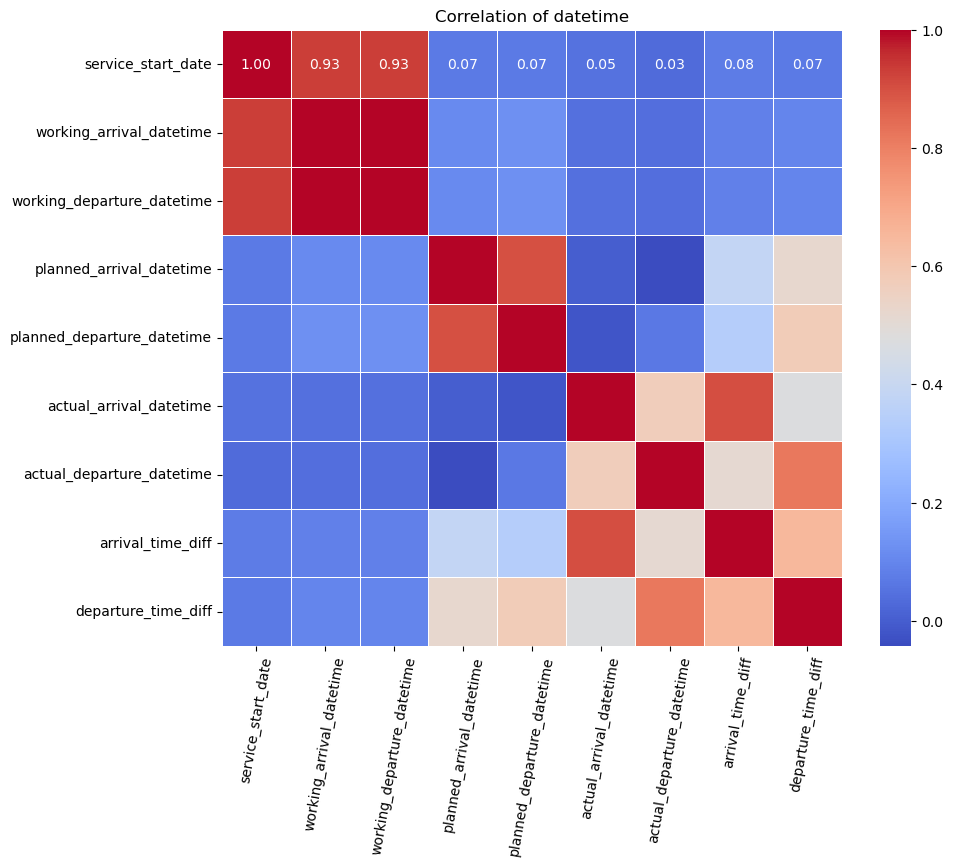

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm',annot=True,fmt=".2f",linewidth=0.5)
plt.title('Correlation of datetime')
plt.xticks(rotation=80)
plt.show()

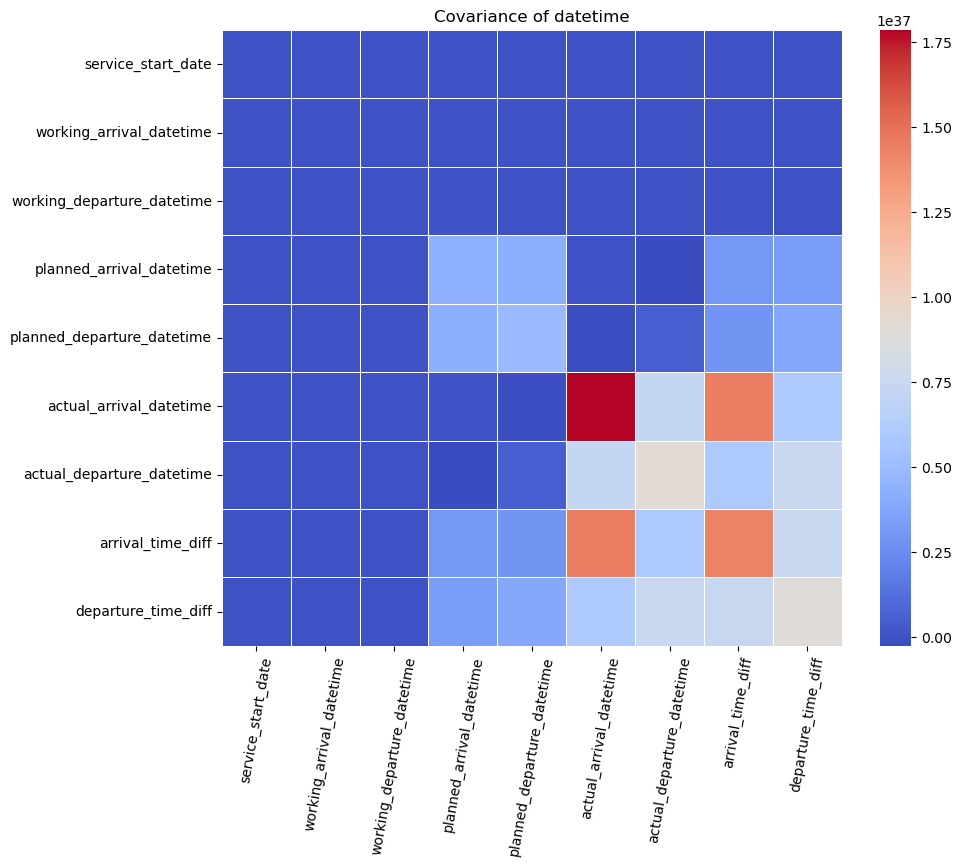

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(cov,cmap='coolwarm',fmt=".2f",linewidth=0.5)
plt.title('Covariance of datetime')
plt.xticks(rotation=80)
plt.show()

In [57]:
# Example boolean data over time
time_index = pd.date_range('2022-01-01', periods=10, freq='D')
boolean_values = [True, False, True, False, True, False, True, False, True, False]

# Convert boolean values to 1s and 0s
boolean_numeric = [1 if value else 0 for value in boolean_values]

In [58]:
# sns.countplot(x='is_delayed_arrival', y='planned_arrival_datetime', data=final_working_df)

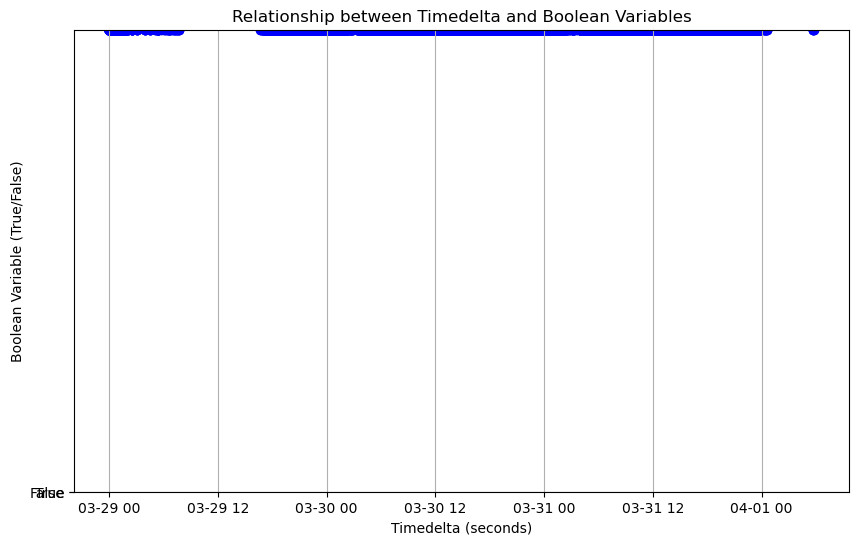

In [59]:
final_working_df['planned_arrival'] = final_working_df['planned_arrival_datetime'].dt.hour

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(final_working_df['planned_arrival_datetime'], final_working_df['planned_arrival_datetime'], color='blue', marker='o')
plt.title('Relationship between Timedelta and Boolean Variables')
plt.xlabel('Timedelta (seconds)')
plt.ylabel('Boolean Variable (True/False)')
plt.yticks([0, 1], ['False', 'True'])  # Customizing y-axis labels
plt.grid(True)
plt.show()

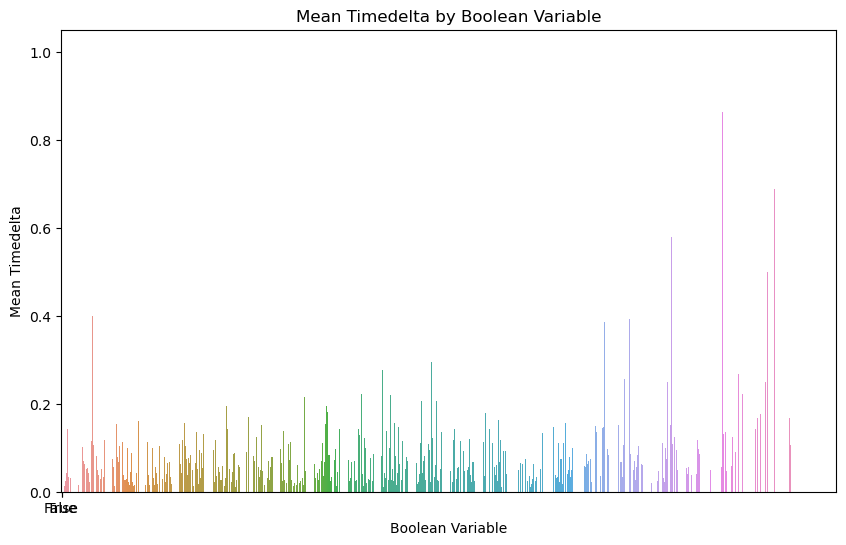

In [60]:
grouped = final_working_df.groupby('is_delayed_arrival')['planned_arrival_datetime'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='planned_arrival_datetime', y='is_delayed_arrival', data=final_working_df, errorbar=None)
plt.title('Mean Timedelta by Boolean Variable')
plt.xlabel('Boolean Variable')
plt.ylabel('Mean Timedelta')
plt.xticks([0, 1], ['False', 'True'])  # Customizing x-axis labels
plt.show()

In [ ]:
grouped = final_working_df.groupby('is_delayed_arrival')['planned_arrival_datetime'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
colors = sns.color_palette('pastel') 
plt.pie(final_working_df['is_delayed_arrival'],  colors=colors,autopct='%1.1f%%', startangle=140)

# plt.title('Mean Timedelta by Boolean Variable')
# plt.xlabel('Boolean Variable')
# plt.ylabel('Mean Timedelta')
# plt.xticks([0, 1], ['False', 'True'])  # Customizing x-axis labels
# plt.show()
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Pie Chart of Sample Data')
plt.show()